In [63]:
import numpy as np
import matplotlib.pyplot as plt

def func(x):
    return np.sin(2 * x) + np.cos(3 * x) + np.sin(13.3 * x)

In [101]:
def FFT(x):
    x = np.asarray(x, dtype='float32')
    N = x.shape[0]
    
    N_min = min(N, 32)
    
    n = np.arange(N_min)
    k = n[:, None]
    
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))
    
    while X.shape[0] < N:
        index = X.shape[1] // 2
        even = X[:, : index]
        odd = X[:, index :]
        
        factor = np.exp(-1j * np.pi * np.arange(X.shape[0]) / X.shape[0])[:, None]
        X = np.vstack([even + factor * odd, even - factor * odd])
    return X.ravel()

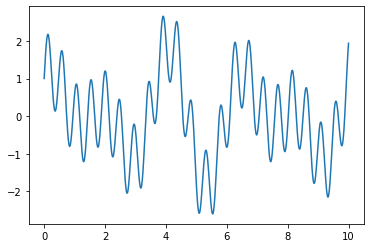

In [103]:
x = np.linspace(0, 10, 1000)
y = func(x)

plt.plot(x, y)
plt.show()

Frequencies:  0.3183098861837907 0.477464829275686 2.116760743122208


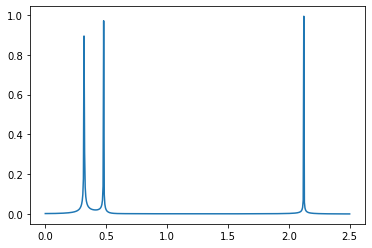

In [104]:
n = np.power(2, 10)
time_delta = 1 / 5

x = np.linspace(0, n * time_delta, n)
y = func(x)

print("Frequencies: ", 2 / (2 * np.pi), 3 / (2 * np.pi), 13.3 / (2 * np.pi))

fft = FFT(y)
x_f = np.linspace(0, 1 / (2 * time_delta), n // 2)

plt.plot(x_f, 2 / n * np.abs(fft[0:n // 2]))
plt.show()

Frequencies:  0.3183098861837907 0.477464829275686 2.116760743122208


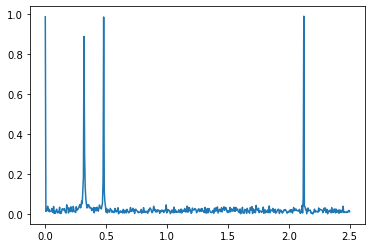

In [105]:
print("Frequencies: ", 2 / (2 * np.pi), 3 / (2 * np.pi), 13.3 / (2 * np.pi))

noise = np.random.rand(*x.shape)
y = func(x) + noise

fft = FFT(y)

plt.plot(x_f, 2 / n * np.abs(fft[0:n // 2]))
plt.show()